In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv('train_modif.csv')
test = pd.read_csv('test_modif.csv')

# Regresion logistica simple
El predictor elegido es la edad

In [3]:
X = train.Age.to_numpy().reshape(-1, 1)
y = train.Survived

Entrenamiento

In [4]:
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [5]:
X_test = test.Sex.to_numpy().reshape(-1, 1)
y_pred = modelo.predict(X_test)

Genero df para subir a Kaggle

In [6]:
ll = test.reset_index()
df = pd.DataFrame()
df['PassengerId'] = ll.PassengerId
df['Survived'] = y_pred
df.set_index('PassengerId', inplace= True)
df.to_csv('Prediccion.csv')

# Regresion multiple

<AxesSubplot: xlabel='Pclass', ylabel='Density'>

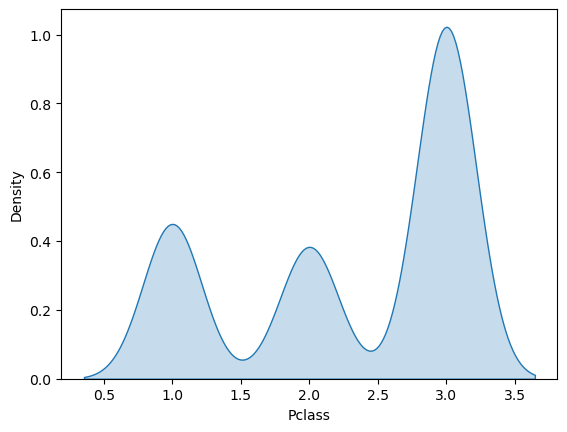

In [7]:
sns.kdeplot(train.Pclass, fill = True)

<AxesSubplot: xlabel='Age', ylabel='Density'>

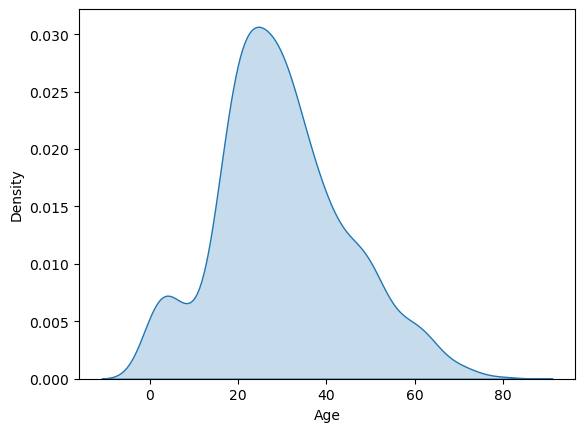

In [8]:
sns.kdeplot(train.Age, fill = True)

<AxesSubplot: xlabel='Sex', ylabel='Density'>

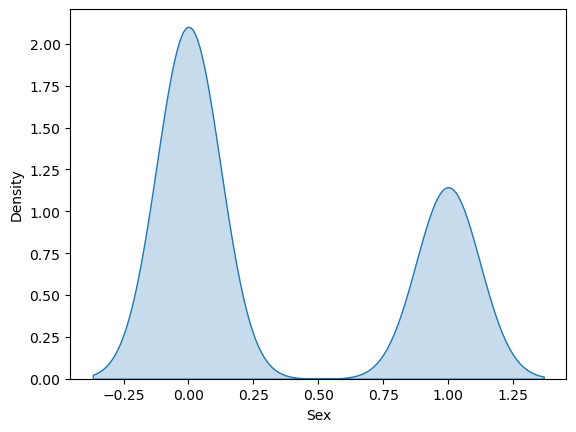

In [9]:
sns.kdeplot(train.Sex, fill = True)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
train.Age = scaler.fit_transform(train.Age.to_numpy().reshape(-1, 1))

<AxesSubplot: xlabel='Age', ylabel='Density'>

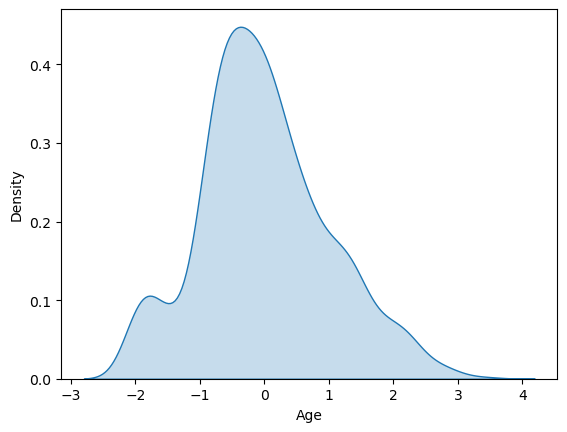

In [12]:
train.head()
sns.kdeplot(train.Age, fill = True)

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

In [14]:
X = train[['Age', 'Pclass', 'Sex']]
y = train.Survived.to_numpy()

In [15]:
modelo = LogisticRegression()
modelo.fit(X, y)

LogisticRegression()

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Age_imp      332 non-null    float64
dtypes: float64(3), int64(6), object(1)
memory usage: 32.8+ KB


In [17]:
X_test = test[['Age', 'Pclass', 'Sex']]
y_pred = modelo.predict(X_test)

In [18]:
ll = test.reset_index()
df = pd.DataFrame()
df['PassengerId'] = ll.PassengerId
df['Survived'] = y_pred
df.set_index('PassengerId', inplace= True)
df.to_csv('Prediccion_multiple.csv')